In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utility import read_csv_file, rename_columns, filter_columns, map_to_major_category, plot_industry_boxplots, perform_cross_validation, \
    calculate_growth_rates, predict_salary, prepare_salary_experience_model_data, analyze_features, build_and_evaluate_random_forest_model

In [2]:
df = read_csv_file('manager_survery.csv') #reading data from csv 

### Describing Data
As the data is quite raw and hard to perform data operation requires some basic data cleaning like filtering 'USA' region and columns renaming

In [3]:
df.columns # checking columns 

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [4]:
df.shape #row and column size

(28089, 18)

In [5]:
df.head() #viewing data rows

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Data Cleaning

In [6]:
# Filter for rows where country indicates the United States
us_data = df[df['What country do you work in?'].str.contains("United States|USA|US", na=False, case=False)]
us_data.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


In [7]:
# Rename columns for easier processing
renamed_columns = {
    'Timestamp': 'timestamp',
    'How old are you?': 'age_group',
    'What industry do you work in?': 'industry',
    'Job title': 'job_title',
    'If your job title needs additional context, please clarify here:': 'job_context',
    'What is your annual salary? (You\'ll indicate the currency in a later question. '
    'If you are part-time or hourly, please enter an annualized equivalent -- '
    'what you would earn if you worked the job 40 hours a week, 52 weeks a year.)': 'annual_salary',
    'How much additional monetary compensation do you get, if any '
    '(for example, bonuses or overtime in an average year)? Please only include monetary compensation here, '
    'not the value of benefits.': 'additional_compensation',
    'Please indicate the currency': 'currency',
    'If "Other," please indicate the currency here:': 'other_currency',
    'If your income needs additional context, please provide it here:': 'income_context',
    'What country do you work in?': 'country',
    'If you\'re in the U.S., what state do you work in?': 'state',
    'What city do you work in?': 'city',
    'How many years of professional work experience do you have overall?': 'overall_experience',
    'How many years of professional work experience do you have in your field?': 'field_experience',
    'What is your highest level of education completed?': 'education_level',
    'What is your gender?': 'gender',
    'What is your race? (Choose all that apply.)': 'race'
}

us_data = rename_columns(us_data, renamed_columns)
us_data.head()

,timestamp,age_group,industry,job_title,job_context,annual_salary,additional_compensation,currency,"If ""Other,"" please indicate the currency here:",income_context,country,state,city,overall_experience,field_experience,education_level,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


In [8]:
# Clean salary columns by removing commas and converting to numeric
us_data['annual_salary'] = us_data['annual_salary'].str.replace(",", "").astype(float)
us_data['additional_compensation'] = us_data['additional_compensation'].fillna(0)


In [9]:
# Create a new column for total compensation
us_data['total_compensation'] = us_data['annual_salary'] + us_data['additional_compensation']


In [10]:
us_data['major_industry'] = us_data['industry'].apply(map_to_major_category)
us_data = us_data[us_data.major_industry!='Other'] # removing others industry data and keeping only relavant data

In [11]:
experience_order = [
    '1 year or less',
    '2 - 4 years',
    '5-7 years',
    '8 - 10 years',
    '11 - 20 years',
    '21 - 30 years',
    '31 - 40 years',
    '41 years or more'
]

### Investigation
#### 1.) How do salary distributions vary across experience levels within each industry

In [12]:
# Group data by industry and overall experience, calculate salary statistics
salary_analysis = us_data.sort_values(
    by=['major_industry', 'overall_experience'],
    key=lambda x: pd.Categorical(x, categories=experience_order, ordered=True)
)
for industry in list(salary_analysis['major_industry'].unique()):
    industry_analysis = salary_analysis[salary_analysis.major_industry==industry]
    print(industry_analysis.groupby(['major_industry', 'overall_experience'])['annual_salary'].describe())



                                          count           mean            std  \
major_industry        overall_experience                                        
Professional Services 1 year or less       40.0   84892.850000   84514.401245   
                      11 - 20 years       625.0  107425.419200   58583.345312   
                      2 - 4 years         245.0   68871.351020   27844.094964   
                      21 - 30 years       172.0  118351.110465  108053.896069   
                      31 - 40 years        44.0  203780.090909  741085.910742   
                      41 years or more      6.0  123000.000000   65674.957175   
                      5-7 years           362.0   81979.751381   70121.896329   
                      8 - 10 years        377.0   98061.289125   49431.209965   

                                              min      25%       50%  \
major_industry        overall_experience                               
Professional Services 1 year or less      380

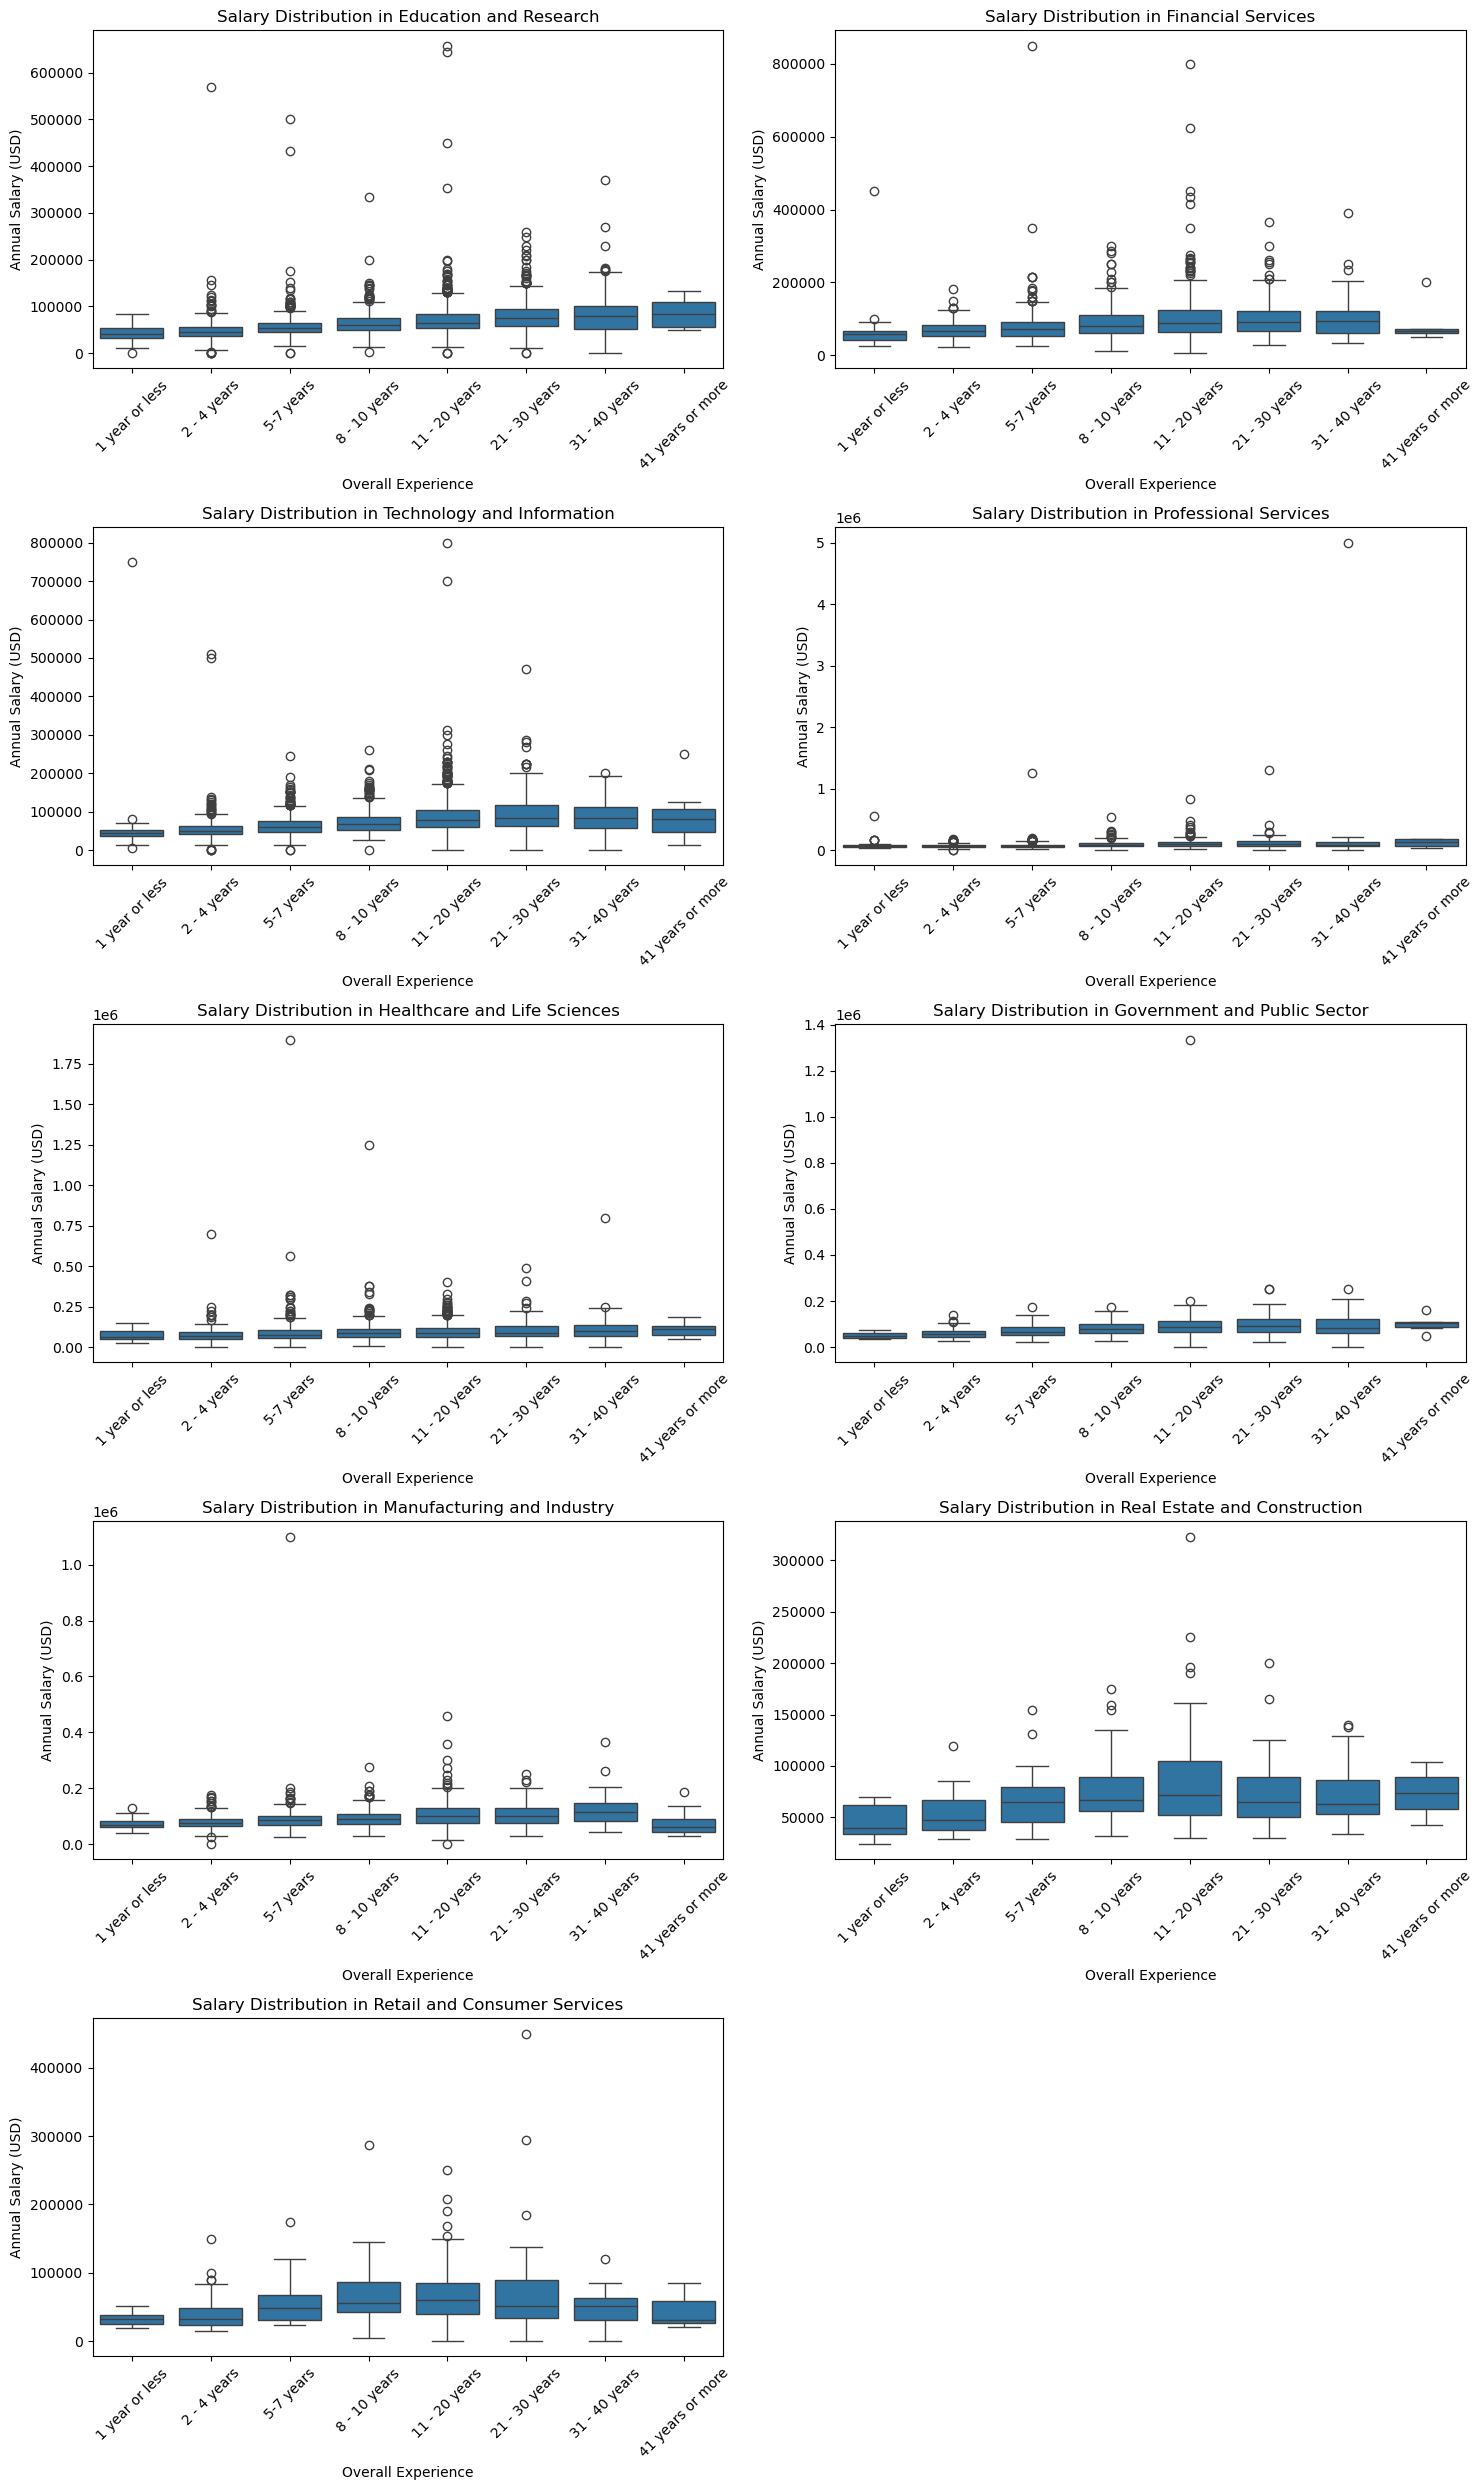

In [13]:

# Filter data for visualization
filtered_data = filter_columns(us_data, ['major_industry', 'overall_experience', 'annual_salary'])

# Get unique industries
industries = filtered_data['major_industry'].unique()

# Create plots
plot_industry_boxplots(filtered_data, industries)

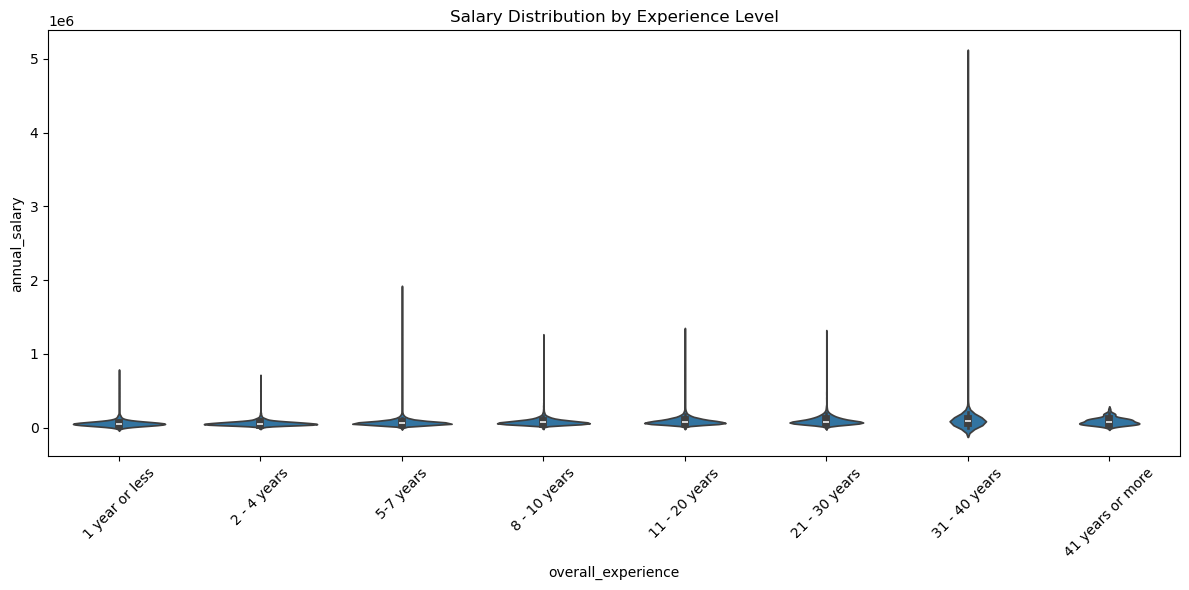

In [14]:
# Calculate summary statistics by experience level across all industries
experience_summary = us_data.groupby('overall_experience')['annual_salary'].agg([
    'mean', 'median', 'std', 'count'
]).round(2)


# Calculate industry-specific metrics
industry_metrics = us_data.groupby('major_industry').agg({
    'annual_salary': ['mean', 'median', 'std', 'count']
}).round(2)

# Create a pivot table for experience-industry comparison
salary_pivot = pd.pivot_table(
    us_data,
    values='annual_salary',
    index='major_industry',
    columns='overall_experience',
    aggfunc='median'
).round(2)

# Calculate the salary range (max - min) for each industry
salary_range = us_data.groupby('major_industry').agg({
    'annual_salary': lambda x: x.max() - x.min()
}).round(2)

# Visualization of salary distributions
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=us_data,
    x='overall_experience',
    y='annual_salary',
    order=experience_order
)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Experience Level')
plt.tight_layout()
plt.show()


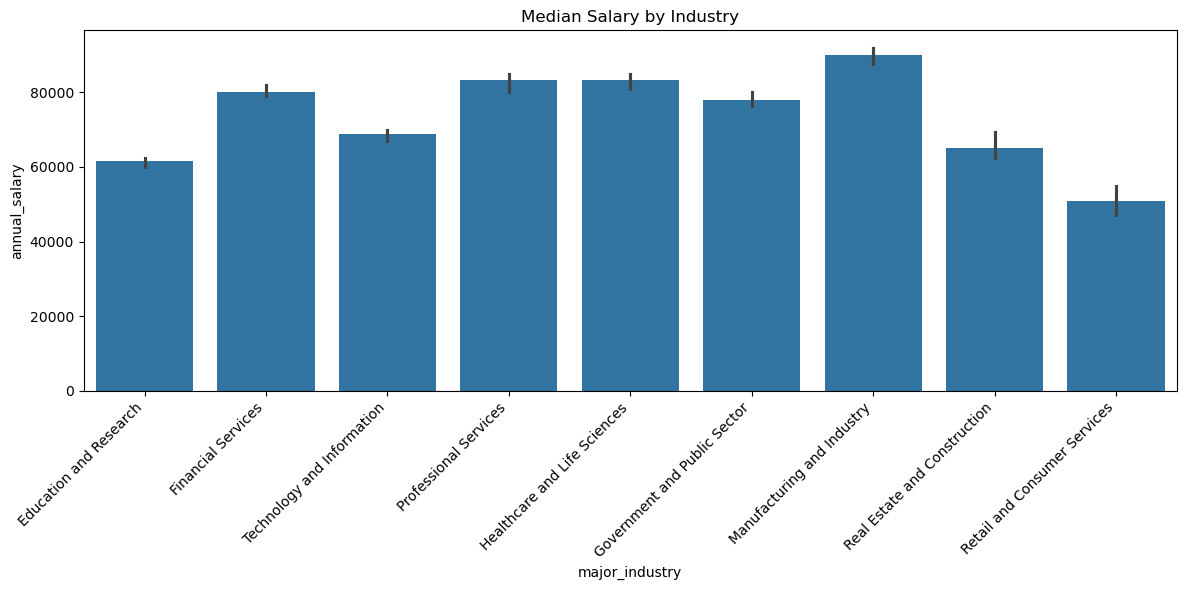

In [15]:
# Industry comparison plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=us_data,
    x='major_industry',
    y='annual_salary',
    estimator='median'
)
plt.xticks(rotation=45, ha='right')
plt.title('Median Salary by Industry')
plt.tight_layout()
plt.show()

In [16]:
X, y, industry_enc, exp_enc = prepare_salary_experience_model_data(us_data)
model, metrics, X_test, y_test = build_and_evaluate_random_forest_model(X, y)

# Analyze feature importance
feature_importance = analyze_features(model, ['Industry', 'Experience'])

# Print results
print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

print("\nFeature Importance:")
print(feature_importance)

Model Performance Metrics:
RMSE: 46680.35
MAE: 28019.68
R2: 0.06
MAPE: inf

Feature Importance:
      Feature  Importance
0    Industry    0.515408
1  Experience    0.484592


In [18]:
perform_cross_validation(model, X, y)

{'Mean CV Score': 0.0560502036927478, 'CV Score Std': 0.017479061911063225}

In [ ]:
# us_data.to_csv('cleaned_manager.csv', index=False)